# Week 10 Activity

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Read the data into python

In [15]:
data=pd.read_csv("/home/iswar/Downloads/10. Correlation & Regression-20220809T142826Z-001/10. Correlation _ Regression/week10.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


In [17]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [18]:
data.shape

(2011, 9)

# 2. Check for null values

In [19]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

There are no null values in the dataset.

# 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.

In [20]:
data["Hardness"].describe()

count    2011.000000
mean      195.968072
std        32.635085
min        73.492234
25%       176.744938
50%       197.191839
75%       216.441070
max       317.338124
Name: Hardness, dtype: float64

Text(0.5, 1.0, 'Distribution of Hardness')

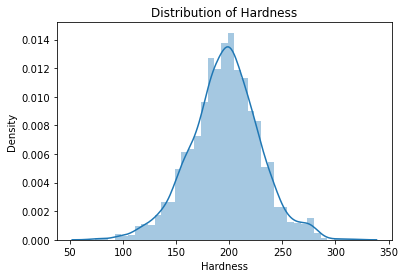

In [21]:
sns.distplot(data["Hardness"])
plt.title("Distribution of Hardness")

Text(0.5, 1.0, 'Boxplot of Hardness')

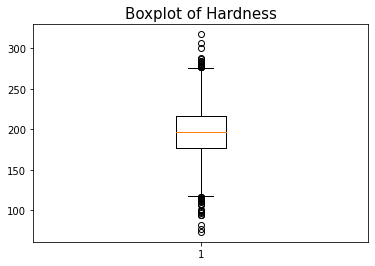

In [22]:
plt.boxplot(data["Hardness"])
plt.title("Boxplot of Hardness",fontsize=15)

Hardness is normally distributed. There are outliers. 

In [23]:
data["Sulfate"].describe()

count    2011.000000
mean      333.224672
std        41.205172
min       129.000000
25%       307.632511
50%       332.232177
75%       359.330555
max       481.030642
Name: Sulfate, dtype: float64

Text(0.5, 1.0, 'Distribution of Sulfate')

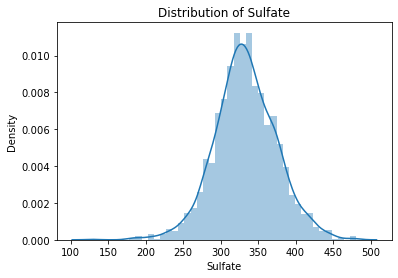

In [24]:
sns.distplot(data["Sulfate"])
plt.title("Distribution of Sulfate")

Text(0.5, 1.0, 'Boxplot of Sulfate')

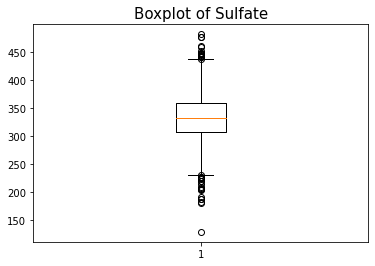

In [25]:
plt.boxplot(data["Sulfate"])
plt.title("Boxplot of Sulfate",fontsize=15)

Sulfate is also normally distributed. There are outliers in the given data.

In [26]:
data["Organic_carbon"].describe()

count    2011.000000
mean       14.357709
std         3.324959
min         2.200000
25%        12.124105
50%        14.322019
75%        16.683049
max        27.006707
Name: Organic_carbon, dtype: float64

Text(0.5, 1.0, 'Distribution of Organic_carbon')

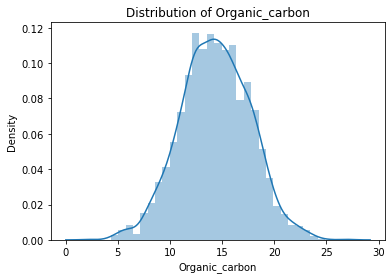

In [27]:
sns.distplot(data["Organic_carbon"])
plt.title("Distribution of Organic_carbon")

Text(0.5, 1.0, 'Boxplot of Organic_carbon')

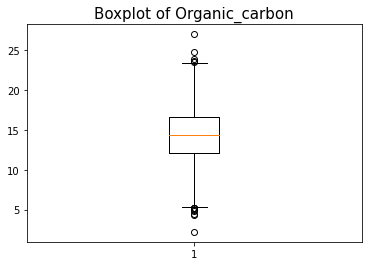

In [28]:
plt.boxplot(data["Organic_carbon"])
plt.title("Boxplot of Organic_carbon",fontsize=15)

Organic carbon is also normally distributed. There are outliers in the given data but the number of outliers are comparitively lesser than Hardness and Sulfate.

In [34]:
data1=data[["Hardness", "Sulfate", "Organic_carbon"]]

In [35]:
data1.skew(axis = 0, skipna = True)

Hardness         -0.085237
Sulfate          -0.046558
Organic_carbon   -0.020018
dtype: float64

The low value of skew also confirms that the data on Hardness, Sulfate and Organic Carbon are normally distributed.

# 4. Carry out correlation analysis on the dataset and find the correlation factor between
a. ph and Chloramines <br> b. ph and Conductivity
<br> What do we infer from this correlation value?

In [36]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


<AxesSubplot:>

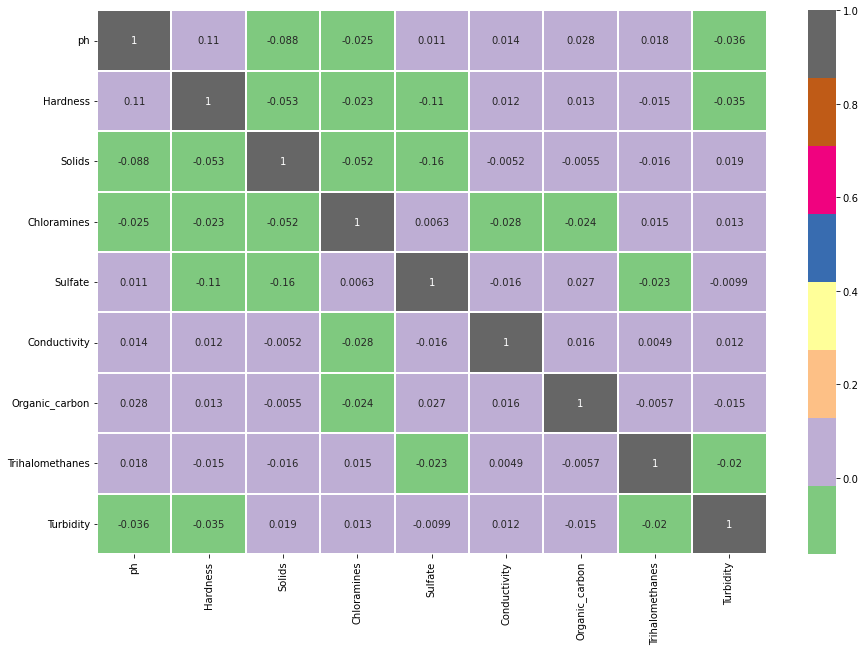

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.2,cmap='Accent')

In [45]:
data2=data[["ph", "Chloramines"]]

<AxesSubplot:>

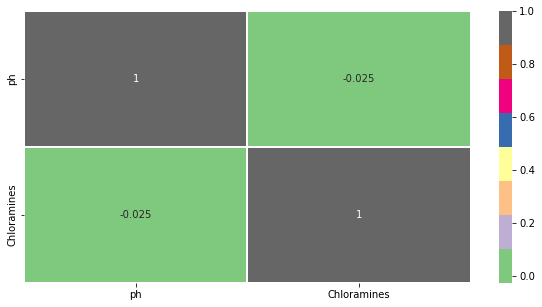

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(data2.corr(),annot=True,linewidth=0.2,cmap='Accent')

In [47]:
data3=data[["ph", "Conductivity"]]

<AxesSubplot:>

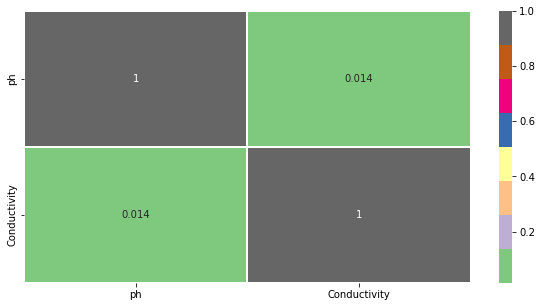

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(data3.corr(),annot=True,linewidth=0.2,cmap='Accent')

Inferences:
<br>1. ph and Chloramines have a negative correlation of -0.025. These values are independent of each other
<br>2. ph and Conductivity have a positive correlation of 0.014. These values are also independent of each other.